In [21]:
import imageio
import visvis as vv
import numpy as np
from PIL import Image

# I have not given, received, nor have I tolerated others' use of unauthorized aid.

In [22]:
AH_img = imageio.imread("../Datasets/RosterImages/AHauck.jfif", as_gray='True')
AJ_img = imageio.imread("../Datasets/RosterImages/ajohnson.jfif", as_gray='True')
DH_img = imageio.imread("../Datasets/RosterImages/dherschel.jfif", as_gray='True')
AO_img = imageio.imread("../Datasets/RosterImages/aortiz.jfif", as_gray='True')
AH_img2 = Image.open("../Datasets/RosterImages/AHauck.jfif")

print(np.shape(AH_img))
print(np.shape(AJ_img))
print(np.shape(DH_img))
print(np.shape(AO_img))
AH_rsize = AH_img2.resize((480, 640))
print(np.shape(AH_rsize))
# AH_rsize.save("../Datasets/RosterImages/AHauck_rsize.jfif")
# AH_rsize2 = imageio.imread("../Datasets/RosterImages/AHauck_rsize.jfif", as_gray='True')
# print(np.shape(AH_rsize2))

(640, 480)
(640, 480)
(640, 480)
(640, 480)
(640, 480, 3)


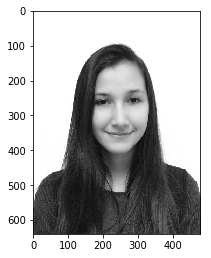

In [23]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(AO_img, cmap=plt.cm.gray)
plt.show()

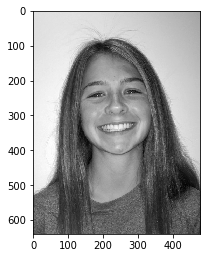

In [24]:
plt.figure()
plt.imshow(AJ_img, cmap=plt.cm.gray)
plt.show()

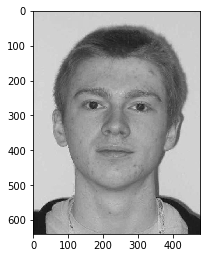

In [25]:
plt.figure()
plt.imshow(AH_img, cmap=plt.cm.gray)
plt.show()

# Part 1: Linear Combinations
Load ALL of the images, and check their sizes (you can use the code above as a starter).
Store these images in a list of matrices (rather than individual names or an array).

Notice: You can store images that have different dimensions in a LIST of the matrices. However, if you store them as an array with each matrix as a new entry, only the matrices that are the same size will be able to be stored.

In [26]:
#Put your code here!
from pathlib import Path
import glob

imgs = {}

for img_uri in glob.glob("../Datasets/RosterImages/*.jfif"): 
    img = imageio.imread(img_uri, as_gray='True')
    size = np.shape(img)
    
    if size in imgs:
        imgs[size].append(img)
    else:
        imgs[size] = [img]

for k, v in imgs.items():
    print(k, len(v)) 
    # => shows (640, 480) to be the mode size (5)

(640, 480) 18


Now, loop over your list and extract all the matrices that are the same size and store those in an array.
If you prefer, you can actually go back and modify you loop(s) above to do so, and re-execute the cell.

#### Merging Images via Linear Combinations
Write a loop to make 10 images with progressive combinations of two different images that are the same size. The first image should be just one of the basic images, and the last should be the other image. These should all be stored in the same array, with the final index being which image in the sequence it is. (I.E., [x-indx, y-indx, img-indx] ). 

0.0 \% Target-1;  100.0 \% Target-2


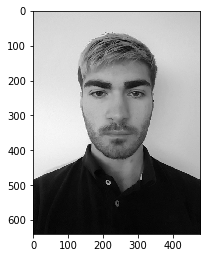

10.0 \% Target-1;  90.0 \% Target-2


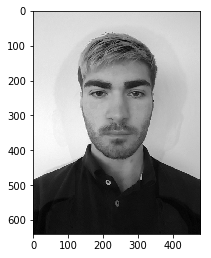

20.0 \% Target-1;  80.0 \% Target-2


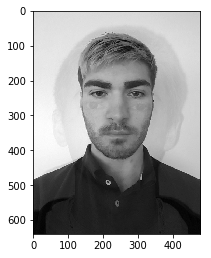

30.0 \% Target-1;  70.0 \% Target-2


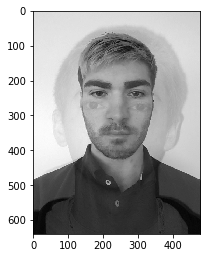

40.0 \% Target-1;  60.0 \% Target-2


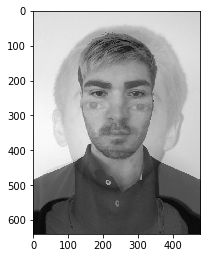

50.0 \% Target-1;  50.0 \% Target-2


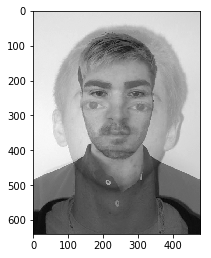

60.0 \% Target-1;  40.0 \% Target-2


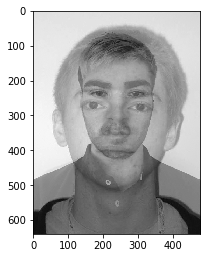

70.0 \% Target-1;  30.0 \% Target-2


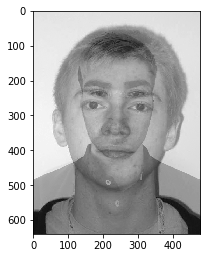

80.0 \% Target-1;  20.0 \% Target-2


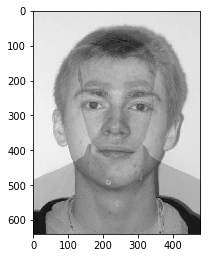

90.0 \% Target-1;  10.0 \% Target-2


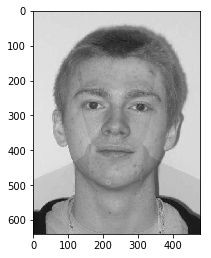

100.0 \% Target-1;  0.0 \% Target-2


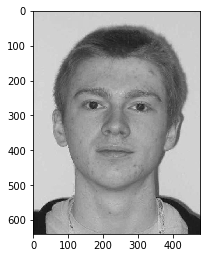

In [27]:
#Loop over to make the combinations of the images. 
targets = imgs[(640, 480)]
target1 = targets[0]
target2 = targets[1]

for concentration in range(0, 11):
    c1 = concentration/10.0 
    c2 = (10.0 - concentration)/10.0
    
    print(c1 * 100, "\% Target-1; ", c2 * 100, "\% Target-2")
    plt.figure()
    plt.imshow(c1*target1+c2*target2, cmap=plt.cm.gray)
    plt.show()

#### Making an animation
Look at these two sites, and attempt to animate the transition between the two images.

http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

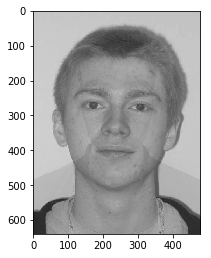

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

target1 = targets[0]
target2 = targets[1]
fig, ax = plt.subplots()

im = plt.imshow(target2, animated=True)
    
# animation function. This is called sequentially
def animate(concentration):
    c1 = concentration/10.0 
    c2 = (10.0 - concentration)/10.0
    
    im.set_array(c1*target1 + c2*target2)
    return (im,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=10, interval=200, blit=True)
HTML(anim.to_html5_video())

# Part 2: Edge detection in a Picture
Let's try to do the edge detection from the convolutions intro, but on some of the images.

#### Replicating code from the convolutions notebook.
Copy the code for the "Top" matrix, the "Straight" matrices, and the "diagonal" matrices.

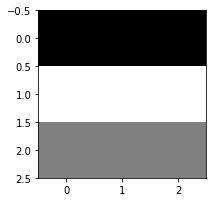

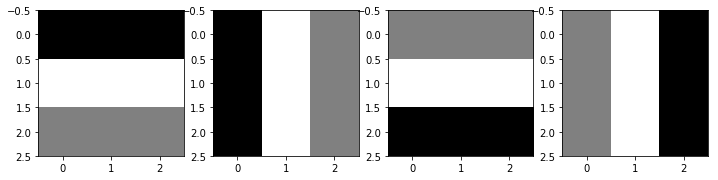

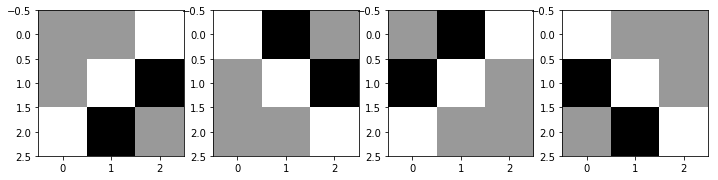

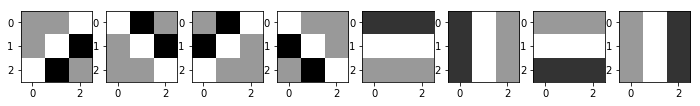

In [29]:
# Put all that code here.

%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
# from scipy.ndimage import imread
# from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

# Put all that code here.
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]
plot(top)


straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

plots(diags + straights)

#### Edge detection with convolutions
Use the convolutions example to apply the straight and diagonal matrices through convolutions to at least two images. I'd recommend using Ari's image and another one.

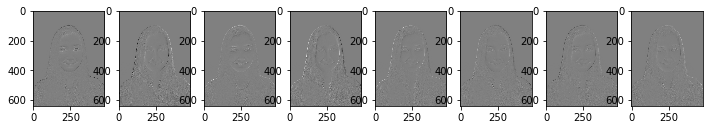

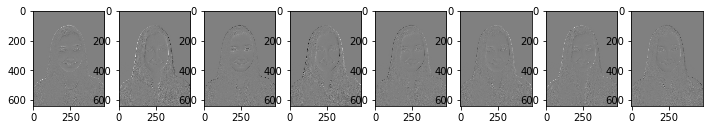

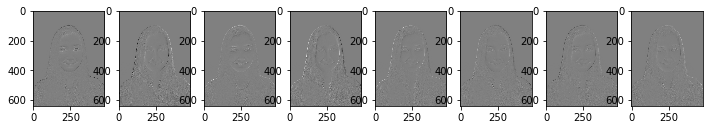

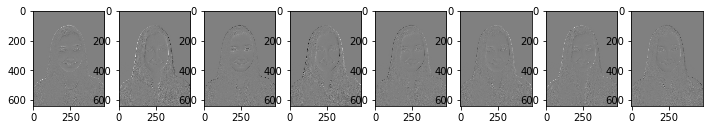

In [30]:
rots = straights + diags
corrs = []
convs = [] 

# AO

for rot in rots:
    tempConv = convolve(AO_img, rot)
    convs.append(tempConv)
    
    tempCorr = correlate(AO_img, rot)
    corrs.append(tempCorr)
    
    np.allclose(tempConv, tempCorr)

plots(corrs)
plots(convs)

# AJ

corrs.clear()
convs.clear()

for rot in rots:
    tempConv = convolve(AO_img, rot)
    convs.append(tempConv)
    
    tempCorr = correlate(AO_img, rot)
    corrs.append(tempCorr)
    
    np.allclose(tempConv, tempCorr)
    
plots(corrs)
plots(convs)

# Part 3: Resize all your images
This will require a significant amount of saving and loading... but it'll almost all be the same command. 
Practice your python skills by writing a loop that uses the file name, reads it in, resizes than rewrites it!
You may want to use the python module "OS" ...which has commands for getting all the files from a directory etc.

Also worth noting, I had to import an additional package, "Image" from "PIL" to get the simple resizing modules... we may talk about that mathematical process later...

End goal:
A dictionary with (key, value) of (name, image_array) ... where each image array is a 640 x 480 image.

AHauck (640, 480)
CGarzella (640, 480)
GCarvajal (640, 480)
JBulger (640, 480)
JGaudy (640, 480)
ajohnson (640, 480)
akawano (640, 480)
aortiz (640, 480)
atighe (640, 480)
bsukowicz (640, 480)
dherschel (640, 480)
dshelly (640, 480)
kschmitt (640, 480)
owasim (640, 480)
rkulwicki (640, 480)
rshomer (640, 480)
tshomer (640, 480)
vmehta (640, 480)


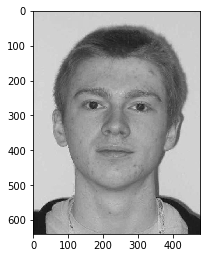

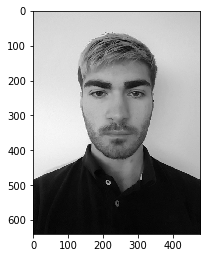

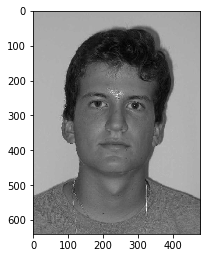

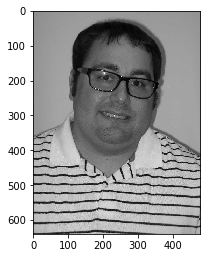

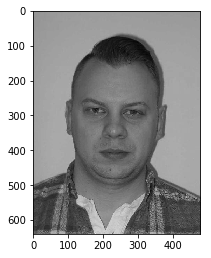

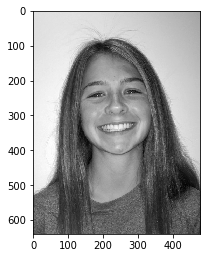

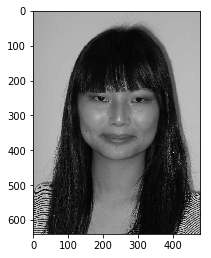

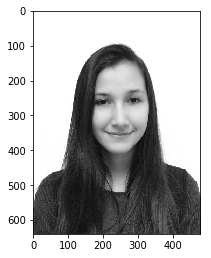

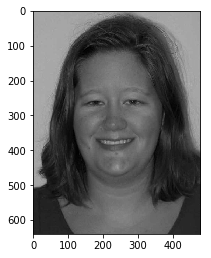

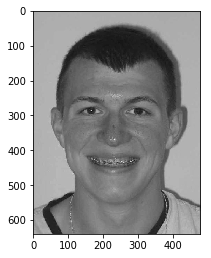

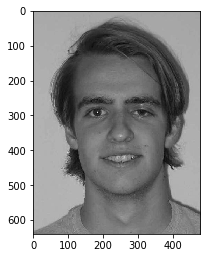

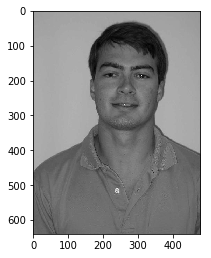

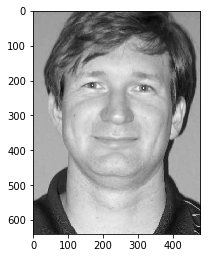

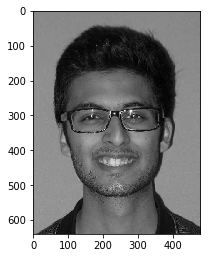

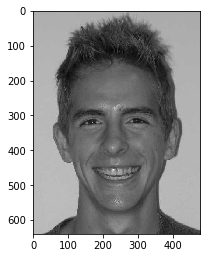

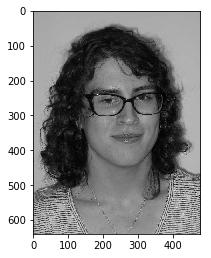

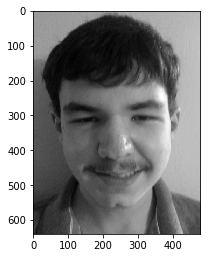

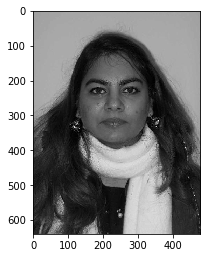

In [31]:
#Put your code here
import imageio
import visvis as vv
import numpy as np
import glob
from PIL import Image
from pathlib import Path

imgs = {}
targetSize = (480, 640)

for img_uri in glob.glob("../Datasets/RosterImages/*.jfif"): 
    img = Image.open(img_uri)
    img_name = img_uri.split("/")[-1].split(".")[0]
    size = np.shape(img)[:2]
    
    #reversing for below comparison
    sizeRef = (size[1], size[0])
    
    if sizeRef != targetSize:
        img.resize(targetSize).save(img_uri)

    img.close()
    img = imageio.imread(img_uri, as_gray='True')
    imgs[img_name] = img
    
    
# quick check
for k, v in imgs.items():
    plot(v)
    print(k, np.shape(v)) 
    


The following parts are based largely on the lab "Eigenfaces" from the textbook "Coding the Matrix". It has been modified to use standard packages (for SVD and images) as well as use roster images and a general image file (with some faces some not).

# Part 4: Computing the Centroid and the Centered Image Vectors
In this part you'll compute an averaged image, and the resulting "centered" image vectors

## Task: Compute the Centroid of the Images
Find the centroid (average) of the face images.

[[168.9055 168.7388 168.6633 ... 166.1685 166.058  165.9469]
 [168.8499 168.8499 168.83   ... 166.2796 166.2802 166.1295]
 [168.6833 168.7944 168.9411 ... 166.4463 166.4073 166.4073]
 ...
 [ 97.7039 100.1278 101.8593 ...  86.0287  86.5686  89.8452]
 [ 95.5888  96.2612  98.4532 ...  81.0075  80.6942  86.8051]
 [ 93.0722  92.1145  91.6754 ...  81.8997  80.2452  86.7036]]
(640, 480)


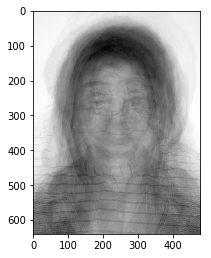

In [32]:
#Enter your code here!

icopy = imgs.copy()
img_matrix_list = list(map(lambda img: np.matrix(img), icopy.values()))
centroid = np.mean( img_matrix_list, axis=0 )

print(centroid)
plot(centroid)
print(np.shape(centroid))

## Task: Compute the Centered Image Vectors
> For any image vector, the _centered image vector_ is obtained by subtracting the centroid.

Construct a new dictionary with the _centered image vectors_ (or matrices)


In [33]:
#Enter you code here.
cen_img_vecs = {name: img - centroid for name, img in imgs.items()}
    
print(cen_img_vecs["rshomer"])
print(imgs["rshomer"])    

[[-7.0625e+00 -6.8958e+00 -6.8203e+00 ...  1.5849e-01  2.6900e-01  3.8011e-01]
 [-7.0069e+00 -7.0069e+00 -6.9870e+00 ...  4.7394e-02  4.6783e-02  1.9745e-01]
 [-6.8403e+00 -6.9514e+00 -7.0981e+00 ... -1.1928e-01 -8.0322e-02 -8.0322e-02]
 ...
 [ 7.6274e+01  8.7850e+01  8.4831e+01 ...  8.7825e+01  9.4584e+01  7.4319e+01]
 [ 4.8378e+01  6.7706e+01  8.0525e+01 ...  6.8846e+01  5.5459e+01  2.5359e+01]
 [-1.8105e+01 -9.1475e+00  3.1303e+01 ...  2.1954e+01  2.0908e+01  6.4604e+00]]
[[161.843 161.843 161.843 ... 166.327 166.327 166.327]
 [161.843 161.843 161.843 ... 166.327 166.327 166.327]
 [161.843 161.843 161.843 ... 166.327 166.327 166.327]
 ...
 [173.978 187.978 186.69  ... 173.854 181.153 164.164]
 [143.967 163.967 178.978 ... 149.854 136.153 112.164]
 [ 74.967  82.967 122.978 ... 103.854 101.153  93.164]]


# Part 5: Finding A reduced dimension representation of the image data
In this part, we'll unroll the images into vectors, then decompose the joint matrix using a standard SVD implementation.

## Task: Create a single matrix of image vectors
Each row should consist of the **_unrolled_** image, that is, the image reshaped to be a single ROW vector.

In [34]:
#Enter your code here. You shouldn't NEED two loops, but it might help you frame your thinking 
# to unroll all the images then combine them (via stack?) into one matrix.
unrolled_imgs = []

for img in cen_img_vecs.values():
    unrolled_imgs.append(img.flatten())
    
unrolled_imgs = np.matrix(unrolled_imgs)  
print(unrolled_imgs)
print(np.shape(unrolled_imgs))

[[ 16.8065  16.9732  17.0487 ... -34.2097 -32.5552 -40.0136]
 [ 28.1825  28.3492  28.0657 ... -71.7597 -70.1052 -75.5636]
 [ -3.0625  -2.8958  -2.8203 ...  25.9883  31.6428  27.1844]
 ...
 [ -7.0625  -6.8958  -6.8203 ...  21.9543  20.9078   6.4604]
 [-13.6875 -15.5208 -15.4453 ...  -1.0457   5.6088   4.1504]
 [-11.1935 -11.0268 -10.9513 ... -29.9267 -45.5702 -24.7876]]
(18, 307200)


## Task: Find the SVD of your matrix.
Use the code from the Day 9's exercises to find the SVD of your centered image matrix.

In [35]:
#Take code from the exercise!

# This also represents Q3a on the Questions Lab
u, s, vt = np.linalg.svd(unrolled_imgs, full_matrices=False)

# Insight into question 5
_,s2,vh = np.linalg.svd(unrolled_imgs[0], full_matrices=False)
print(unrolled_imgs[0]/s2)
print(vh)

print(u.shape)
print(s.shape)
print(vt.shape)

[[ 0.0008  0.0008  0.0008 ... -0.0016 -0.0015 -0.0019]]
[[-0.0008 -0.0008 -0.0008 ...  0.0016  0.0015  0.0019]]
(18, 18)
(18,)
(18, 307200)


## Task: Find a 10-dimensional vector space...
Use the above decomposition to define a 10-dimension orthonormal basis for the vector space that is closest to the centered face image vectors.

**Note:** This should be very quick, with only 1-3 lines of code!

In [36]:
# Code here!
ten_dem_space = [ u.T[i].A1 for i in np.argsort(s)[-10:] ]
ten_dem_space = np.matrix(ten_dem_space)

print(ten_dem_space)

[[-0.0682  0.3805  0.0386  0.0708  0.2296  0.3155 -0.2943 -0.3369 -0.1171 -0.1527 -0.118  -0.2074
  -0.0676 -0.1096 -0.0461  0.5529  0.1533 -0.2232]
 [ 0.2915 -0.0779  0.3081 -0.2975  0.3844 -0.2458  0.1386 -0.1287 -0.0546  0.2004 -0.0756  0.3547
  -0.1003 -0.4267 -0.2905  0.1411 -0.1005 -0.0207]
 [-0.0407 -0.2186  0.3054 -0.2396  0.3138  0.3654  0.1559 -0.1519 -0.4531 -0.0767 -0.1366 -0.2419
   0.1051  0.1957  0.0593 -0.3218  0.1486  0.2315]
 [ 0.2586  0.3277  0.0694 -0.4031 -0.0631 -0.1417 -0.5467 -0.1258 -0.0278  0.1777  0.2348 -0.051
  -0.1133  0.2277  0.1816 -0.119  -0.1788  0.2928]
 [-0.0741  0.2953  0.1058  0.4945  0.0496  0.1296  0.1235 -0.3818 -0.0807 -0.0339 -0.0092  0.2555
  -0.1403 -0.0078  0.0236 -0.3146 -0.5211  0.0863]
 [ 0.0504  0.0344 -0.0534 -0.4215 -0.0738  0.2457  0.327  -0.1619  0.1808  0.0755  0.165  -0.0863
   0.3075  0.1665  0.076   0.0732 -0.431  -0.4739]
 [-0.2045  0.4449  0.0478 -0.1213  0.1147 -0.3753  0.1614 -0.191   0.0996 -0.0272 -0.0778  0.1197
   0.0349